## 0. Computer vision libraries in PyTorch
* `torchvision` - base domain library for Pytorch computer vision
* `torchvision.datasets` - get datasets and data loading functions for computer vision
* `torchvision.models` - get pretrained computer vision models that we can leverage for building our own models
* `torchvision.transforms` - functions for manipulating teh vision data (images) to be suitable for use with an ML model.
* `torch.utils.data.Dataset` - Base dataset class for Pytorch
* `torch.utils.data.DataLoader` - Creates a Python iterable over the dataset

In [50]:
# Import PyTorch
import torch
from torch import nn

#Import torchvision
import torchvision
from torchvision import datasets
from torchvision import transforms
from torchvision.transforms import ToTensor

#Import matplotlib for visualization
import matplotlib.pyplot as plt

#Check version
print(torch.__version__)
print(torchvision.__version__)

2.4.1+cu121
0.19.1+cu121


## 1. Getting the Dataset

In [51]:
#Setup training data
train_data=datasets.FashionMNIST(
    root="data", # Where to download data to
    train=True, # Do we want the training or testing data
    download=True, # To download teh  data or not
    transform=torchvision.transforms.ToTensor(), #
    target_transform=None
)

#Setting up Test data
test_data=datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor(),
    target_transform=None
)

## 2. Exploring the Data

In [52]:
len(train_data),len(test_data)

(60000, 10000)

In [53]:
#Take a look at the data
img,label=train_data[0]
img,label #print the image tensor and its label

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0510,
           0.2863, 0.0000, 0.0000, 0.0039, 

In [54]:
#Get the classes
class_names=train_data.classes
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [55]:
#Get classes and respective index
class_to_idx=train_data.class_to_idx
class_to_idx

{'T-shirt/top': 0,
 'Trouser': 1,
 'Pullover': 2,
 'Dress': 3,
 'Coat': 4,
 'Sandal': 5,
 'Shirt': 6,
 'Sneaker': 7,
 'Bag': 8,
 'Ankle boot': 9}

In [56]:
#Check the shape of image
image_shape=img.shape,label
print(f"Image shape is :{image_shape[0]}\nHeight: {image_shape[0][1]}\nWidth: {image_shape[0][2]}\nColor Channels: {image_shape[0][0]}\nLabel:{class_names[image_shape[1]]}")

Image shape is :torch.Size([1, 28, 28])
Height: 28
Width: 28
Color Channels: 1
Label:Ankle boot


Image shape torch.Size([1, 28, 28])


(-0.5, 27.5, 27.5, -0.5)

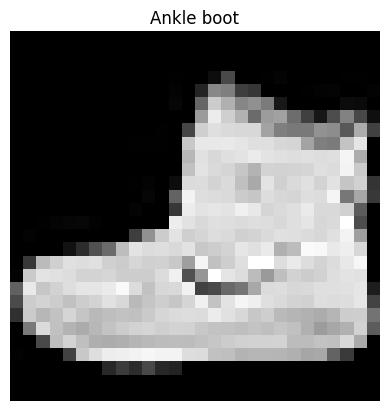

In [57]:
# Viusualize the first image
image,label=train_data[0]
print("Image shape",image.shape)
plt.imshow(image.squeeze(),cmap='gray')
plt.title(class_names[label])
plt.axis(False)

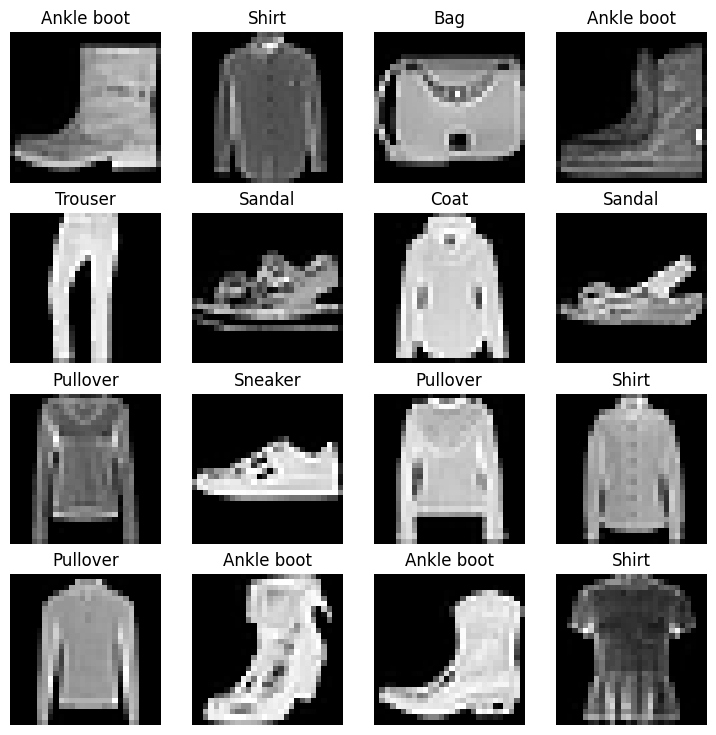

In [58]:
#View random image
torch.manual_seed(42)
fig=plt.figure(figsize=(9,9))
rows,cols=4,4
for i in range(1,rows*cols+1):
  random_idx=torch.randint(0,len(train_data),size=[1]).item()
  img,label=train_data[random_idx]
  fig.add_subplot(rows,cols,i)
  plt.imshow(img.squeeze(),cmap="gray")
  plt.title(class_names[label])
  plt.axis(False)

## Prepare DataLoader

Mini batch Gradient Descent: https://youtu.be/4qJaSmvhxi8?si=DtgLQjpIPmReVoIc

In [59]:
train_data,test_data

(Dataset FashionMNIST
     Number of datapoints: 60000
     Root location: data
     Split: Train
     StandardTransform
 Transform: ToTensor(),
 Dataset FashionMNIST
     Number of datapoints: 10000
     Root location: data
     Split: Test
     StandardTransform
 Transform: ToTensor())

In [60]:
#Initiating Data Loader
from torch.utils.data import DataLoader

BATCH_SIZE=16

train_dataloader=DataLoader(train_data,
                            batch_size=BATCH_SIZE,
                            shuffle=True)

test_dataloader=DataLoader(test_data,
                           batch_size=BATCH_SIZE,
                           shuffle=False)

train_dataloader,test_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x7b37b20e4550>,
 <torch.utils.data.dataloader.DataLoader at 0x7b37b20c9cf0>)

In [61]:
#Length of Dataloaders
len(train_dataloader),len(test_dataloader)

(3750, 625)

In [62]:
#Check the dataloader
train_features_batch,train_label_batch=next(iter(train_dataloader))
train_features_batch.shape,train_label_batch.shape

(torch.Size([16, 1, 28, 28]), torch.Size([16]))

(-0.5, 27.5, 27.5, -0.5)

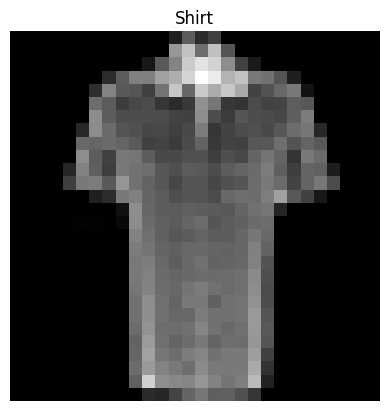

In [63]:
#show a sample
torch.manual_seed(42)
random_idx=torch.randint(0,len(train_features_batch),size=[1]).item()
img,label=train_features_batch[random_idx],train_label_batch[random_idx]
plt.imshow(img.squeeze(),cmap='gray')
plt.title(class_names[label])
plt.axis(False)

## Base Model - 0

### Understanding the Flatten layer

In [64]:
#Flatten layer
flatten_model=nn.Flatten()

#Get a single sample
x=train_features_batch[0]
print("Before Flatenning: ",x.shape)

#Flatten x
flat=flatten_model(x)
print("After Flatenning: ",flat.shape)

Before Flatenning:  torch.Size([1, 28, 28])
After Flatenning:  torch.Size([1, 784])


### Building the model

In [65]:
#Base model 0
from torch import nn

class FashionMNISTmodel0(nn.Module):
  def __init__(self,input_shape:int,hidden_units:int,output_shape:int):
    super().__init__()
    self.layer_stack=nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=input_shape,out_features=hidden_units),
        nn.Linear(in_features=hidden_units,out_features=output_shape)
    )

  def forward(self,x):
    return self.layer_stack(x)

In [66]:
#Initiate the model
torch.manual_seed(42)
model0=FashionMNISTmodel0(
    input_shape=28*28,
    hidden_units=10,
    output_shape=len(class_names)
).to("cpu")

model0

FashionMNISTmodel0(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=10, bias=True)
    (2): Linear(in_features=10, out_features=10, bias=True)
  )
)

In [67]:
model0.state_dict()

OrderedDict([('layer_stack.1.weight',
              tensor([[ 0.0273,  0.0296, -0.0084,  ..., -0.0142,  0.0093,  0.0135],
                      [-0.0188, -0.0354,  0.0187,  ..., -0.0106, -0.0001,  0.0115],
                      [-0.0008,  0.0017,  0.0045,  ..., -0.0127, -0.0188,  0.0059],
                      ...,
                      [-0.0116,  0.0273, -0.0344,  ...,  0.0176,  0.0283, -0.0011],
                      [-0.0230,  0.0257,  0.0291,  ..., -0.0187, -0.0087,  0.0001],
                      [ 0.0176, -0.0147,  0.0053,  ..., -0.0336, -0.0221,  0.0205]])),
             ('layer_stack.1.bias',
              tensor([-0.0093,  0.0283, -0.0033,  0.0255,  0.0017,  0.0037, -0.0302, -0.0123,
                       0.0018,  0.0163])),
             ('layer_stack.2.weight',
              tensor([[ 0.0614, -0.0687,  0.0021,  0.2718,  0.2109,  0.1079, -0.2279, -0.1063,
                        0.2019,  0.2847],
                      [-0.1495,  0.1344, -0.0740,  0.2006, -0.0475, -0.2514, -0.

### Loss and optimizer functions

In [68]:
#Loss Function
loss_fn=nn.CrossEntropyLoss()

#Optimizer Function
optimizer=torch.optim.SGD(params=model0.parameters(),lr=0.1)

In [69]:
import requests
from pathlib import Path

if Path('helper_functions.py').is_file():
  print('Already exists')
else:
  request=requests.get('https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/refs/heads/main/helper_functions.py')
  with open('helper_functions.py',"wb") as f:
    f.write(request.content)

from helper_functions import accuracy_fn

Already exists


In [70]:
# Fucntion to time the experiments
from timeit import default_timer as timer
def print_train_time(start:float,end:float,device:torch.device=None):
  total_time=end-start
  print(f"Train time on {device}: {total_time:.3f} seconds")
  return total_time

### Creating a Training Loop

In [71]:
#To show progress bar
from tqdm.auto import tqdm

torch.manual_seed(42)
train_time_start_cpu=timer()

epochs=3

for epoch in tqdm(range(epochs)):
  print(f"Epoch: {epoch+1}\n-----")
  train_loss=0

  for batch,(X,y) in enumerate(train_dataloader):
    model0.train()
    y_pred=model0(X)

    loss=loss_fn(y_pred,y)
    train_loss+=loss #acumalate the train loss

    optimizer.zero_grad()

    loss.backward()

    optimizer.step()
    if batch%400==0:
      print(f'Looked at {batch*len(X)}/{len(train_dataloader.dataset)} samples')

  #Divide total train loss by length of train dataloader
  train_loss/=len(train_dataloader)

  test_loss,test_acc=0,0
  model0.eval()
  with torch.inference_mode():
    for Xt,yt in test_dataloader:
      test_pred=model0(Xt)
      test_loss+=loss_fn(test_pred,yt)
      test_acc+=accuracy_fn(yt,test_pred.argmax(dim=1))
    #Calculate test loss per batch
    test_loss/=len(test_dataloader)
    test_acc/=len(test_dataloader)

  print(f"Train Loss: {train_loss:.4f} | Test loss: {test_loss:.4f} | Test Accuracy: {test_acc:.4f}")

train_time_end_on_cpu=timer()
total_train_time_model_0=print_train_time(train_time_start_cpu,train_time_end_on_cpu,device=str(next(model0.parameters()).device))

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 1
-----
Looked at 0/60000 samples
Looked at 6400/60000 samples
Looked at 12800/60000 samples
Looked at 19200/60000 samples
Looked at 25600/60000 samples
Looked at 32000/60000 samples
Looked at 38400/60000 samples
Looked at 44800/60000 samples
Looked at 51200/60000 samples
Looked at 57600/60000 samples
Train Loss: 0.5831 | Test loss: 0.5314 | Test Accuracy: 81.3100
Epoch: 2
-----
Looked at 0/60000 samples
Looked at 6400/60000 samples
Looked at 12800/60000 samples
Looked at 19200/60000 samples
Looked at 25600/60000 samples
Looked at 32000/60000 samples
Looked at 38400/60000 samples
Looked at 44800/60000 samples
Looked at 51200/60000 samples
Looked at 57600/60000 samples
Train Loss: 0.4939 | Test loss: 0.4963 | Test Accuracy: 82.8100
Epoch: 3
-----
Looked at 0/60000 samples
Looked at 6400/60000 samples
Looked at 12800/60000 samples
Looked at 19200/60000 samples
Looked at 25600/60000 samples
Looked at 32000/60000 samples
Looked at 38400/60000 samples
Looked at 44800/60000 samples
Lo

### Predict and Evaluate Model 0

In [72]:
torch.manual_seed(42)

def evaluate_model(model:torch.nn.Module,data_loader:torch.utils.data.DataLoader, loss_fn:torch.nn.Module,accuracy_fn)->dict:
  loss,acc=0,0
  model.eval()
  with torch.inference_mode():
    for x,y in data_loader:
      y_preds=model(x)

      loss+=loss_fn(y_preds,y)
      acc+=accuracy_fn(y,y_preds.argmax(dim=1))

    loss/=len(data_loader)
    acc/=len(data_loader)

  return {"Model name": model.__class__.__name__,
          "Model Loss": loss.item(),
          "Model Accuracy": acc}

model0_result=evaluate_model(model=model0,data_loader=test_dataloader,loss_fn=loss_fn,accuracy_fn=accuracy_fn)
model0_result

{'Model name': 'FashionMNISTmodel0',
 'Model Loss': 0.5098506212234497,
 'Model Accuracy': 82.73}

## Model 1

### Device Agnostic Code

In [73]:
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Device:{device}")

Device:cuda


In [74]:
!nvidia-smi

Sun Oct  6 08:07:26 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   67C    P0              29W /  70W |    187MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

### Building Model 1

In [75]:
# Model 1
from torch import nn
class FashionMNIST_model1(nn.Module):
  def __init__(self,input_shape:int,hidden_units:int,output_shape:int):
    super().__init__()
    self.layer_stack=nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=input_shape,out_features=hidden_units),
        nn.ReLU(),
        nn.Linear(in_features=hidden_units,out_features=output_shape),
        nn.ReLU()
    )

  def forward(self,x:torch.Tensor):
    return self.layer_stack(x)

In [76]:
torch.manual_seed(42)

model1=FashionMNIST_model1(input_shape=784,hidden_units=10,output_shape=len(class_names)).to(device)

next(model1.parameters()).device

device(type='cuda', index=0)

### Loss and optimizer

In [77]:
#Loss Function
loss_fn=nn.CrossEntropyLoss()

#Optimizer Function
optimizer=torch.optim.SGD(params=model1.parameters(),lr=0.1)

from helper_functions import accuracy_fn

### Training and testing loop

In [78]:
def train_step(model: torch.nn.Module,data_loader:torch.utils.data.DataLoader,loss_fn:torch.nn.Module,optimizer:torch.optim.Optimizer,accuracy_fn,device:torch.device=device):

  train_loss,train_acc=0,0
  model.to(device)
  model.train()

  for batch,(X,y) in enumerate(data_loader):
    X,y=X.to(device),y.to(device)
    y_pred=model(X)

    loss=loss_fn(y_pred,y)
    train_loss+=loss #acumalate the train loss
    train_acc+=accuracy_fn(y,y_pred.argmax(dim=1)) #acumalate the train accuracy

    optimizer.zero_grad()

    loss.backward()

    optimizer.step()

  #Divide total train loss by length of train dataloader
  train_loss/=len(data_loader)
  train_acc/=len(data_loader)

  print(f'Train loss: {train_loss:.5f} | Train Accuracy: {train_acc:.2f}%')

In [79]:
def test_step(model:torch.nn.Module,data_loader:torch.utils.data.DataLoader,loss_fn:torch.nn.Module,accuracy_fn,device:torch.device=device):

  test_loss,test_acc=0,0
  model.to(device)
  model.eval()
  with torch.inference_mode():
    for X,y in data_loader:
      X,y=X.to(device),y.to(device)
      test_pred=model(X)
      test_loss+=loss_fn(test_pred,y)
      test_acc+=accuracy_fn(y,test_pred.argmax(dim=1))
    #Calculate test loss per batch
    test_loss/=len(data_loader)
    test_acc/=len(data_loader)

  print(f"Test loss: {test_loss:.5f} | Test Accuracy: {test_acc:.2f}%")

### Training the Model

In [80]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

from timeit import default_timer as timer
train_start_on_gpu=timer()

epochs=3

for epoch in tqdm(range(epochs)):
  print(f"Epochs: {epoch+1} \n----------")
  train_step(model=model1,data_loader=train_dataloader,loss_fn=loss_fn,optimizer=optimizer,accuracy_fn=accuracy_fn,device=device)

  test_step(model=model1,data_loader=test_dataloader,loss_fn=loss_fn,accuracy_fn=accuracy_fn,device=device)

train_end_on_gpu=timer()
total_train_time_model_1=print_train_time(train_start_on_gpu,train_end_on_gpu,device=device)

  0%|          | 0/3 [00:00<?, ?it/s]

Epochs: 1 
----------
Train loss: 1.05745 | Train Accuracy: 62.24%
Test loss: 0.95180 | Test Accuracy: 65.66%
Epochs: 2 
----------
Train loss: 0.80703 | Train Accuracy: 70.43%
Test loss: 0.68117 | Test Accuracy: 75.40%
Epochs: 3 
----------
Train loss: 0.67072 | Train Accuracy: 75.71%
Test loss: 0.69884 | Test Accuracy: 74.67%
Train time on cuda: 66.393 seconds


### Evaluating the result

In [81]:
torch.manual_seed(42)

def evaluate_model(model:torch.nn.Module,data_loader:torch.utils.data.DataLoader, loss_fn:torch.nn.Module,accuracy_fn,device:torch.device=device)->dict:
  loss,acc=0,0
  model.eval()
  with torch.inference_mode():
    for x,y in data_loader:
      x,y=x.to(device),y.to(device)
      y_preds=model(x)

      loss+=loss_fn(y_preds,y)
      acc+=accuracy_fn(y,y_preds.argmax(dim=1))

    loss/=len(data_loader)
    acc/=len(data_loader)

  return {"Model name": model.__class__.__name__,
          "Model Loss": loss.item(),
          "Model Accuracy": acc}

In [82]:
model1_result=evaluate_model(model1,test_dataloader,loss_fn,accuracy_fn,device)
print("Model 0 Results:\n",model0_result)
print("Model 1 Results;\n",model1_result)

Model 0 Results:
 {'Model name': 'FashionMNISTmodel0', 'Model Loss': 0.5098506212234497, 'Model Accuracy': 82.73}
Model 1 Results;
 {'Model name': 'FashionMNIST_model1', 'Model Loss': 0.6988440752029419, 'Model Accuracy': 74.67}


## Model 2- CNN

Working of CNN- https://poloclub.github.io/cnn-explainer/

### Building the Model

In [83]:
class FashionMNIST_model2(nn.Module):
  '''Model architecture that replicates the tinyVGG model from CNN explainer website'''
  def __init__(self,input_shape:int,hidden_units:int,output_shape:int):
    super().__init__()
    #Block 1
    self.conv_block1=nn.Sequential(
        #Conv layer
        nn.Conv2d(in_channels=input_shape,out_channels=hidden_units,kernel_size=3,stride=1,padding=1),
        #Relu layer
        nn.ReLU(),
        #Conv layer
        nn.Conv2d(in_channels=hidden_units,out_channels=hidden_units,kernel_size=3,stride=1,padding=1),
        #Relu layer
        nn.ReLU(),
        #Pooling layer
        nn.MaxPool2d(kernel_size=2,stride=2)
    )
    #Block 2
    self.conv_block2=nn.Sequential(
        #Conv layer
        nn.Conv2d(in_channels=hidden_units,out_channels=hidden_units,kernel_size=3,stride=1,padding=1),
        #Relu layer
        nn.ReLU(),
        #Conv layer
        nn.Conv2d(in_channels=hidden_units,out_channels=hidden_units,kernel_size=3,stride=1,padding=1),
        #Relu layer
        nn.ReLU(),
        #Pooling layer
        nn.MaxPool2d(kernel_size=2)
    )
    #Classifier Layer
    self.classifier=nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=hidden_units*7*7,out_features=output_shape)
    )

  def forward(self,x):
    x=self.conv_block1(x)
    #print(f'Conv block 1 output shape:{x.shape}')
    x=self.conv_block2(x)
    #print(f'Conv block 2 output shape:{x.shape}')
    x=self.classifier(x)
    #print(f'Output shape:{x.shape}')
    return x

In [84]:
torch.manual_seed(42)

#Initialize the model
model2=FashionMNIST_model2(input_shape=1,hidden_units=30,output_shape=len(class_names)).to(device)
model2

FashionMNIST_model2(
  (conv_block1): Sequential(
    (0): Conv2d(1, 30, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(30, 30, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block2): Sequential(
    (0): Conv2d(30, 30, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(30, 30, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=1470, out_features=10, bias=True)
  )
)

In [85]:
#To get the shape for the output layer
rand_img_tensor=torch.randn(size=(1,28,28))
rand_img_tensor.shape

model2(rand_img_tensor.unsqueeze(dim=0).to(device))

tensor([[ 0.0343,  0.0440, -0.0558, -0.0103,  0.0477, -0.0521,  0.0046, -0.0306,
          0.0024,  0.0029]], device='cuda:0', grad_fn=<AddmmBackward0>)

### Loss and optimizer

In [86]:
from helper_functions import accuracy_fn

loss_fn=nn.CrossEntropyLoss()

optimizer=torch.optim.SGD(params=model2.parameters(),lr=0.1)

### Training and testing the model

We use the above functions for training and testing loop

In [87]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

from timeit import default_timer as timer
train_start_on_gpu_2=timer()

epochs=3

for epoch in tqdm(range(epochs)):
  print(f"Epochs: {epoch+1} \n----------")
  train_step(model=model2,data_loader=train_dataloader,loss_fn=loss_fn,optimizer=optimizer,accuracy_fn=accuracy_fn,device=device)

  test_step(model=model2,data_loader=test_dataloader,loss_fn=loss_fn,accuracy_fn=accuracy_fn,device=device)

train_end_on_gpu_2=timer()
total_train_time_model_2=print_train_time(train_start_on_gpu_2,train_end_on_gpu_2,device=device)

  0%|          | 0/3 [00:00<?, ?it/s]

Epochs: 1 
----------
Train loss: 0.67064 | Train Accuracy: 75.47%
Test loss: 0.33906 | Test Accuracy: 87.97%
Epochs: 2 
----------
Train loss: 0.32106 | Train Accuracy: 88.38%
Test loss: 0.31608 | Test Accuracy: 88.50%
Epochs: 3 
----------
Train loss: 0.28864 | Train Accuracy: 89.58%
Test loss: 0.29137 | Test Accuracy: 89.47%
Train time on cuda: 80.157 seconds


### Evaluate the model

In [88]:
model2_result=evaluate_model(model2,test_dataloader,loss_fn,accuracy_fn,device)
print("Model 0 Results:\n",model0_result)
print("Model 1 Results;\n",model1_result)
print("Model 2 Results;\n",model2_result)

Model 0 Results:
 {'Model name': 'FashionMNISTmodel0', 'Model Loss': 0.5098506212234497, 'Model Accuracy': 82.73}
Model 1 Results;
 {'Model name': 'FashionMNIST_model1', 'Model Loss': 0.6988440752029419, 'Model Accuracy': 74.67}
Model 2 Results;
 {'Model name': 'FashionMNIST_model2', 'Model Loss': 0.291366845369339, 'Model Accuracy': 89.47}


## Compare Results

In [89]:
import pandas as pd
compare_results=pd.DataFrame([model0_result,model1_result,model2_result])
compare_results

,Model name,Model Loss,Model Accuracy
0,FashionMNISTmodel0,0.509851,82.73
1,FashionMNIST_model1,0.698844,74.67
2,FashionMNIST_model2,0.291367,89.47


In [90]:
#Add training time to results table
compare_results['Training Time']=[total_train_time_model_0,total_train_time_model_1,total_train_time_model_2]
compare_results

,Model name,Model Loss,Model Accuracy,Training Time
0,FashionMNISTmodel0,0.509851,82.73,38.715185
1,FashionMNIST_model1,0.698844,74.67,66.392567
2,FashionMNIST_model2,0.291367,89.47,80.156823


Text(0.5, 1.0, 'Accuracy Graphs')

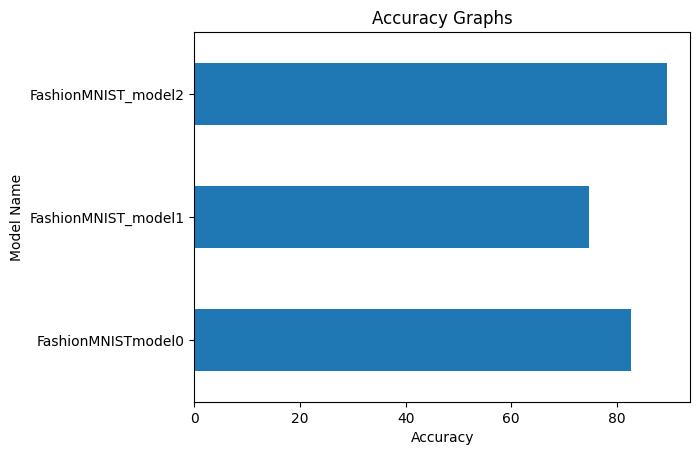

In [91]:
#Visualize th result
compare_results.set_index("Model name")["Model Accuracy"].plot(kind='barh')
plt.xlabel("Accuracy")
plt.ylabel("Model Name")
plt.title("Accuracy Graphs")

### Evaluate Random predictions using best model

In [92]:
def make_predictions(model:nn.Module,data:list,device:torch.device=device):
  pred_probs=[]
  model.to(device)
  model.eval()
  with torch.inference_mode():
    for sample in data:
      #Prepare sample
      sample=torch.unsqueeze(sample,dim=0).to(device)

      #Forward pass
      pred_logit=model(sample)

      #prediction probabilities
      pred_prob=torch.softmax(pred_logit.squeeze(),dim=0)

      #Get pred_prob to cpu
      pred_probs.append(pred_prob.cpu())

  #Stack the pred_probs to turn list to tensor
  return torch.stack(pred_probs)

In [93]:
#Pick random samples
import random
#random.seed(42)
test_samples=[]
test_label=[]
for sample, label in random.sample(list(test_data),k=9):
  test_samples.append(sample)
  test_label.append(label)

test_samples[0].shape

torch.Size([1, 28, 28])

In [94]:
# Make predictions
pred_probs=make_predictions(model=model2,data=test_samples)

#View predictions for 2 predictions
pred_probs[:2]

#Convert prediction probabilities to labels
pred_classes=pred_probs.argmax(dim=1)
pred_classes

tensor([3, 9, 1, 4, 0, 7, 7, 5, 2])

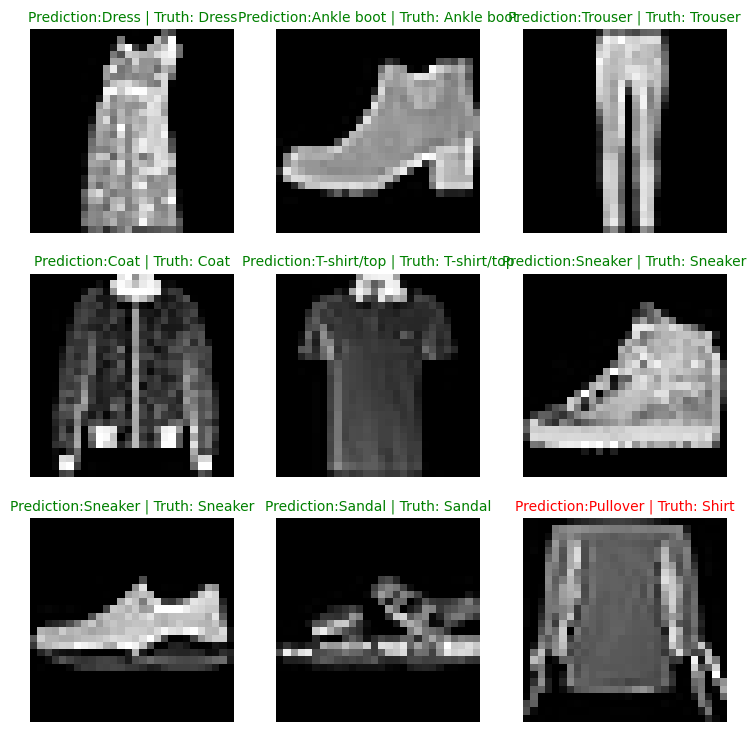

In [95]:
#Plot predictions
plt.figure(figsize=(9,9))
nrows=3
ncols=3
for i ,sample in enumerate(test_samples):
  #create sub plots
  plt.subplot(nrows,ncols,i+1)

  #plot traget image
  plt.imshow(sample.squeeze(),cmap='gray')

  #find predicrion label (text form)
  pred_label=class_names[pred_classes[i]]

  #get true label
  truth_label=class_names[test_label[i]]

  #Create title for plot
  text_title=f"Prediction:{pred_label} | Truth: {truth_label}"

  #Check the equality between truth and predictions and change color of title text
  if pred_label==truth_label:
    plt.title(text_title,fontsize=10,c="g")
  else:
    plt.title(text_title,fontsize=10,c='r')
  plt.axis(False)

### Confusion matrix

Resource: https://rasbt.github.io/mlxtend/user_guide/plotting/plot_confusion_matrix/

In [96]:
import mlxtend
mlxtend.__version__

'0.23.1'

In [97]:
#Make prediction for the whole test set
from tqdm.auto import tqdm

y_preds=[]
model2.eval()
with torch.inference_mode():
  for x,y in tqdm(test_dataloader,desc="Making Predictions"):
    x,y=x.to(device),y.to(device)
    y_logits=model2(x)
    y_pred=torch.softmax(y_logits.squeeze(),dim=0).argmax(dim=1)
    y_preds.append(y_pred.cpu())
#print(y_pred)
y_pred_tensor=torch.cat(y_preds)
y_pred_tensor

Making Predictions:   0%|          | 0/625 [00:00<?, ?it/s]

tensor([9, 2, 1,  ..., 8, 1, 0])

In [98]:
#import libraries if not present
try:
  import torchmetrics
except:
  !pip install -q torchmetrics
  import torchmetrics
  print(torchmetrics.__version__)

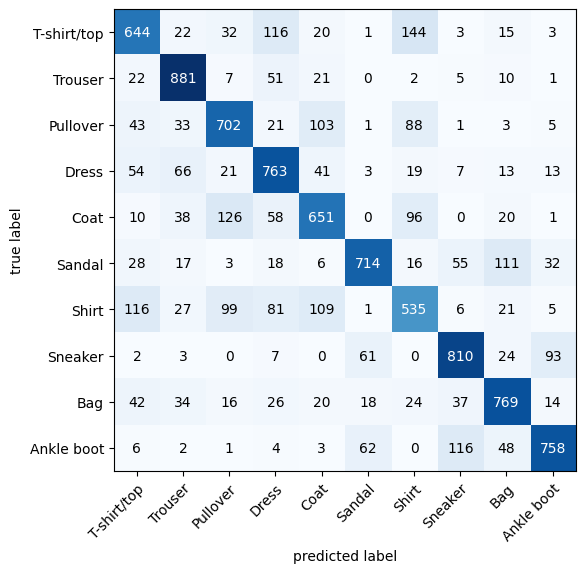

In [105]:
from torchmetrics import ConfusionMatrix
from mlxtend.plotting import plot_confusion_matrix

conf_mat=ConfusionMatrix(num_classes=len(class_names),task='multiclass')
confmat_tensor=conf_mat(y_pred_tensor,test_data.targets)
#print(confmat_tensor)

fig,ax=plot_confusion_matrix(confmat_tensor.numpy(),class_names=class_names,figsize=(10,6))


## Saving and loading the model

In [108]:
#Saving the model
from pathlib import Path

#Creat model directory
MODEL_PATH=Path('models')
MODEL_PATH.mkdir(parents=True,exist_ok=True)

#Create model save path
MODEL_NAME="FashionMNIST_CNN.pth"
MODEL_SAVE_PATH=MODEL_PATH/MODEL_NAME

#Save the model state_dict
print(f'Saving the model to {MODEL_SAVE_PATH}')
torch.save(obj=model2.state_dict(),f=MODEL_SAVE_PATH)

Saving the model to models/FashionMNIST_CNN.pth


In [109]:
#Loading the model
torch.manual_seed(42)

loaded_model=FashionMNIST_model2(input_shape=1,hidden_units=30,output_shape=len(class_names))

#Load teh saved state_dict
loaded_model.load_state_dict(torch.load(f=MODEL_SAVE_PATH))

loaded_model.to(device)

<ipython-input-109-c678927c8933>:7: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  loaded_model.load_state_dict(torch.load(f=MODEL_SAVE_PATH))


FashionMNIST_model2(
  (conv_block1): Sequential(
    (0): Conv2d(1, 30, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(30, 30, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block2): Sequential(
    (0): Conv2d(30, 30, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(30, 30, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=1470, out_features=10, bias=True)
  )
)

In [117]:
#Evaluaute the loaded model
torch.manual_seed(42)

loaded_model_result=evaluate_model(model=loaded_model,data_loader=test_dataloader,loss_fn=loss_fn,accuracy_fn=accuracy_fn)

print(model2_result)
print(loaded_model_result)

torch.isclose(torch.tensor(model2_result['Model Loss']),torch.tensor(loaded_model_result['Model Loss']))

{'Model name': 'FashionMNIST_model2', 'Model Loss': 0.291366845369339, 'Model Accuracy': 89.47}
{'Model name': 'FashionMNIST_model2', 'Model Loss': 0.291366845369339, 'Model Accuracy': 89.47}


tensor(True)